In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('nn_spatialinfo_prequential_fitting_variants_2022-06-23.csv', header=0)

In [41]:
df[-6:]

,fitted_on_ts_all,fitted_on_all_all,ID,fitted_on_cooking_all
309,3.000000,3.000000,median,3.000000
310,3.608414,3.165049,mean,3.411003
311,2.000000,2.000000,median_ts,3.000000
312,2.677419,2.612903,mean_ts,3.005376
313,4.000000,3.000000,median_cooking,3.000000
314,5.008065,4.000000,mean_cooking,4.032258


<AxesSubplot:xlabel='ID'>

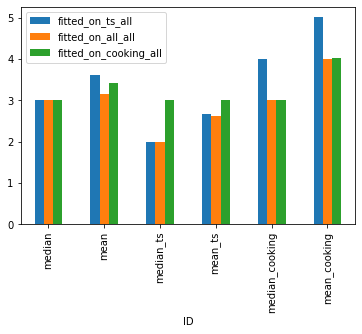

In [12]:
df[-6:].plot(x='ID', y=['fitted_on_ts_all', 'fitted_on_all_all', 'fitted_on_cooking_all'],
            kind='bar')

In [67]:
%matplotlib qt
fig, ax = plt.subplots(constrained_layout=False)

ax.scatter(df['ID'][:-7], df['fitted_on_ts_all'][:-7], label='fitted on tablesetting',
          alpha=0.5, c='blue')
ax.scatter(df['ID'][:-7], df['fitted_on_all_all'][:-7], label='fitted on all seqs',
          zorder=3, marker='D', alpha=0.5, c='orange')
ax.scatter(df['ID'][:-7], df['fitted_on_cooking_all'][:-7], label='fitted on cooking',
          alpha=0.5, c='green')

ax.plot(df['ID'][:-7][:189], [df['fitted_on_ts_all'].loc[df['ID'] == 'mean_ts'] for x in range(189)], 
        label='mean: fitted on tablesetting',
        alpha=1.0, c='blue', linewidth=2, zorder=4)
ax.plot(df['ID'][:-7][190:], [df['fitted_on_ts_all'].loc[df['ID'] == 'mean_cooking'] for x in range(118)],
        alpha=1.0, c='blue', linewidth=2, zorder=4)

ax.plot(df['ID'][:-7], [np.mean(df['fitted_on_all_all'][:-7]) for x in range(len(df['ID'][:-7]))], 
        label='mean: fitted on all',
        alpha=1.0, c='orange', linewidth=2, zorder=5, linestyle='-')

ax.plot(df['ID'][:-7][:189], [df['fitted_on_cooking_all'].loc[df['ID'] == 'mean_ts'] for x in range(189)], 
        label='mean: fitted on cooking',
        alpha=1.0, c='green', linewidth=2, zorder=5)
ax.plot(df['ID'][:-7][190:], [df['fitted_on_cooking_all'].loc[df['ID'] == 'mean_cooking'] for x in range(118)],
        alpha=1.0, c='green', linewidth=2, linestyle='-', zorder=5)


ax.set_ylabel('accumulated prediction error', fontsize=22)
ax.set_xlabel('sequence', fontsize=22)

ax.set_title('NN w/ spatial info: fit comparison', fontsize=24, pad=20)
plt.xticks(df['ID'][:-7], labels=df['ID'][:-7], rotation=90, fontsize=5)
plt.margins(0.01)
lgnd = plt.legend(fontsize=16, framealpha=0.8, loc='upper right', markerscale=2)

plt.show()